# 2.1.2 クラスタリング
- 教師なし学習の一つ
    - 多数のアイテムが与えられた際に、それをいくつかのクラスタに分割する
    - 正解はない

## 2.1.2.1 K-means
- 代表的なクラスタリングアルゴリズム
- 2つの動作を収束するまで繰り返す
    - 仮のクラスタの重心(セントロイド)を求める
    - 最も近い重心に属するように仮のクラスタを再構成する
- 事前にクラスタ数を指定する必要がある

In [1]:
# hideall
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Hiragino Sans"
plt.rcParams["font.size"] = 16

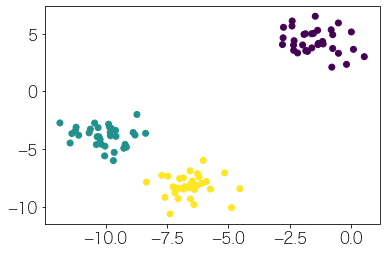

In [4]:
# 3つのクラスタからなるデータセットを作る
X, y = make_blobs(random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
X


array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.

In [3]:
# K-meansによる クラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# 結果の確認
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

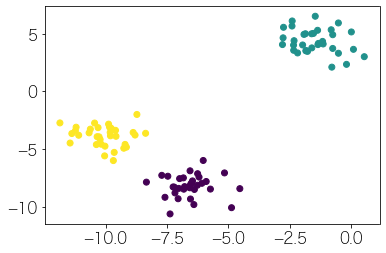

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

In [5]:
# hideall
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [6]:
# hideall
kmeans.labels_ == y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

### K-means アルゴリズムの説明

1. 初期のセントロイドを適当に決める
    - ここではデータの最初の3要素を抜き出しているが、ランダムにしたほうがいい
2. 個々のデータについて、最寄りのセントロイドを調べ、そのセントロイドが代表するクラスタに属することにする。
3. 個々のクラスタに対して、重心点を計算しその点を新たなセントロイドとする。
4. 新しいセントロイドと、一つ前のセントロイドが変化しているか
    - 変化してなければ収束したと判断して終了
    - 変化していれば、2に戻る

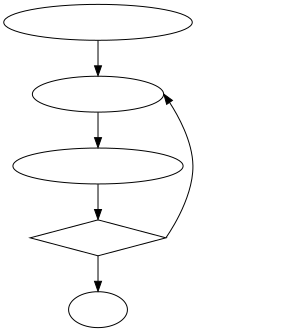

In [7]:
# hide
# K-means
import graphviz
dot = graphviz.Digraph('k-means-flow', engine='neato', graph_attr={'splines': 'polyline', 'esep': '+20'})
dot.node('init', 'セントロイド初期化', pos="0,8!")
dot.node('assign', 'クラスタ割当', pos="0,7!")
dot.node('update', 'セントロイド更新', pos="0,6!")
dot.node('terminate?', '収束判定', shape='diamond', pos="0,5!")
dot.node('done', '終了',  pos="0,4!")
dot.edge('init', 'assign')
dot.edge('assign', 'update')
dot.edge('update', 'terminate?')
dot.edge('terminate?:e', 'assign:e', label='収束していない', pos='0,5 4,5.5 4,6.5 0,7')
dot.edge('terminate?', 'done', label='収束した')
dot

'初期状態。赤三角が適当に決めた初期セントロイド。これを用いてクラスタ割当を行う。'

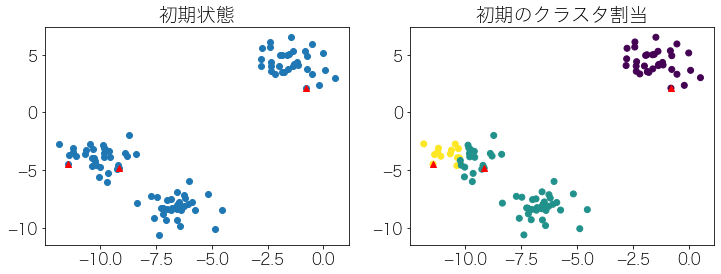

In [8]:
# hide
# 初期化
X, y = make_blobs(random_state=1)
center = X[:3, :]
# クラスタ割当の計算
labels = np.argmin(pairwise_distances(center, X), axis=0)

def two_plot(X, center, labels, title1, title2):
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].scatter(X[:, 0], X[:, 1])
    axes[0].scatter(center[:, 0], center[:, 1], marker='^', color = "red")
    axes[0].set_title(title1)
    axes[1].scatter(X[:, 0], X[:, 1], c = labels)
    axes[1].scatter(center[:, 0], center[:, 1], marker='^', color = "red")
    axes[1].set_title(title2)
two_plot(X, center, labels, '初期状態', '初期のクラスタ割当')
"初期状態。赤三角が適当に決めた初期セントロイド。これを用いてクラスタ割当を行う。"

'1ステップ目'

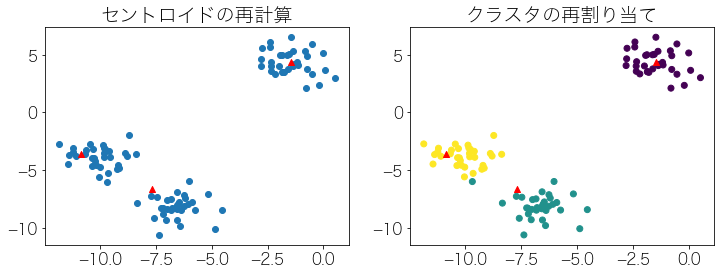

In [9]:
# hide
# セントロイドの再計算
center2 = np.array([X[labels==0].mean(0), X[labels==1].mean(0), X[labels==2].mean(0)])
# クラスタ割当の再計算
labels = np.argmin(pairwise_distances(center2, X), axis=0)
two_plot(X, center2, labels, 'セントロイドの再計算', 'クラスタの再割り当て')
"1ステップ目"

'2ステップ目'

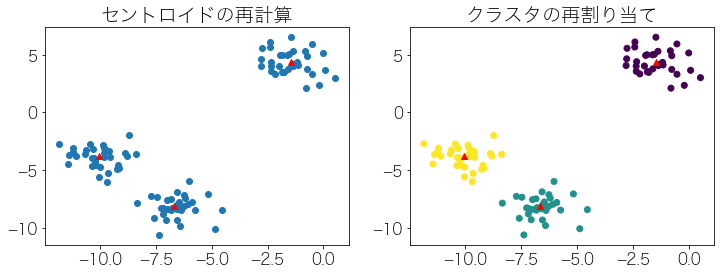

In [10]:
# hide
# セントロイドの再計算
center3 = np.array([X[labels==0].mean(0), X[labels==1].mean(0), X[labels==2].mean(0)])
# クラスタ割当の再計算
labels = np.argmin(pairwise_distances(center3, X), axis=0)
two_plot(X, center3, labels, 'セントロイドの再計算', 'クラスタの再割り当て')
"2ステップ目"

### セントロイドの動き
- 矢印のように動く
- セントロイドの初期値が近くても、自然に分離していく

'セントロイドの動き'

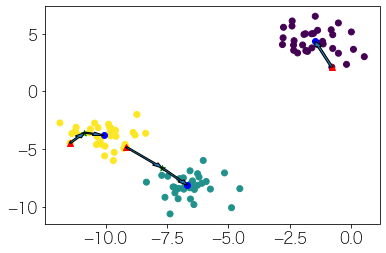

In [11]:
# hide
plt.scatter(X[:, 0], X[:, 1], c = labels)
for i in range(3):
    plt.arrow(center[i, 0], center[i, 1], center2[i, 0] - center[i, 0], center2[i, 1] - center[i, 1], length_includes_head=True, width=0.1)
    plt.arrow(center2[i, 0], center2[i, 1], center3[i, 0] - center2[i, 0], center3[i, 1] - center2[i, 1], length_includes_head=True, width=0.1)
plt.scatter(center[:, 0], center[:, 1], marker='^', color = "red")
plt.scatter(center2[:, 0], center2[:, 1], marker='*', color = "green")
plt.scatter(center3[:, 0], center3[:, 1], marker='o', color = "blue")
"セントロイドの動き"

## クラスタリングの評価指標
- 一般論としてクラスタリングの評価は非常に困難
    - 「妥当な」クラスタはいくらでもあり得る
    - 例: 顔写真をクラスタリングする。男性と女性でクラスタ分類されるのと、メガネのあるなしでクラスタ分類するのとはどちらが良いクラスタリングか?
- 正解データがあるとき
    - ARI: 調整ランド指数
    - NMI: 正規化相互情報量
- シルエットスコア
    - クラスタの凝集度を評価
    - 0-1の値を取る

## K-means の問題点
- 事前にクラスタの数を指定しなければならない
    - 一般にはクラスタ数は事前にはわからない
- 凸形状の分布でないとうまく分割できない

### クラスタ数の決定
- シルエットスコアを用いる
  - 個々の点について、以下のシルエット係数を計算し、すべての点の平均をとったもの
  - シルエット係数: クラスタがまとまっていて、他のクラスタから離れていると高くなる。
    $\frac{b-a}{max(a, b)}$ : その点が含まれているクラスタへの距離を$a$, それ以外で最も近いクラスタへの距離を$b$
- エルボー法
  - クラスタ数を変化させてクラスタリングを複数回行う
  - 出来上がったクラスタの凝集度を、クラスタセンターとの平均二乗誤差で評価
  - 評価値が急に変動した、肘(エルボー)のような形状になっている点のクラスタ数を採用する

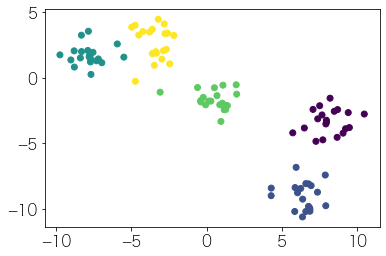

In [12]:
# 5クラスタのデータセットを作る
X, y = make_blobs(random_state=6, centers=5)
plt.scatter(X[:,0], X[:,1], c=y)

- クラスタ数を 3-7 に変えた場合の結果とARI値
    - 注意: ARIは正解がないと算出できないのでクラスタ数の決定には使えない

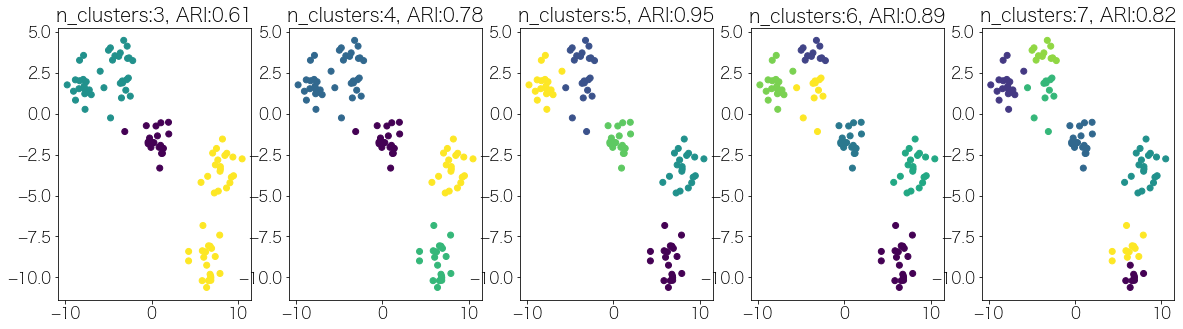

In [13]:
# hide
# 3-7 クラスタでクラスタリングした結果とARI
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
aris, sils, inrs = [], [], []
for i, nc in enumerate(range(3, 8)):
    kmeans = KMeans(n_clusters=nc)
    kmeans.fit(X)
    aris.append(adjusted_rand_score(y, kmeans.labels_))
    sils.append(silhouette_score(X, kmeans.labels_))
    inrs.append(kmeans.inertia_)
    axes[i].scatter(X[:,0], X[:,1], c=kmeans.labels_)
    axes[i].set_title("n_clusters:{}, ARI:{:.2f}".format(nc, aris[-1]))

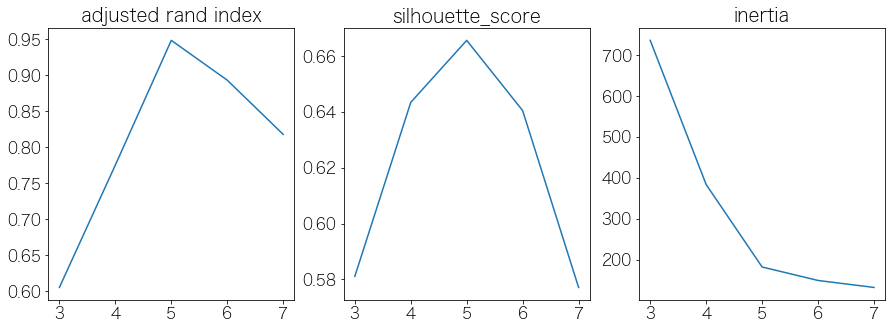

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(range(3, 8), aris)
axes[0].set_title("adjusted rand index")
axes[1].plot(range(3, 8), sils)
axes[1].set_title("silhouette_score")
axes[2].plot(range(3, 8), inrs)
axes[2].set_title("inertia")
None

### 2.1.2.2 凝集型クラスタリング
- 1点1クラスタという状況から初めて徐々にクラスタを大きくしていく
- 最も近接している2つのクラスタを融合して、クラスタの数を減らしていく
- デンドログラムを見ると適切なクラスタ数がわかる

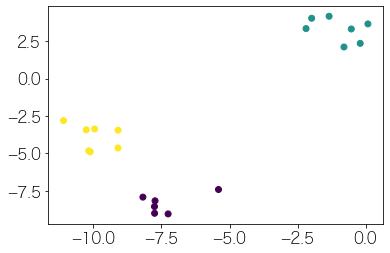

In [15]:
X, y = make_blobs(random_state=1, n_samples=20)
agg = AgglomerativeClustering(n_clusters=3)
agg.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=agg.labels_)

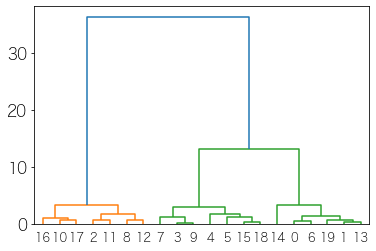

In [16]:
# デンドログラムの描画
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X)
dendrogram(linkage_array)
None

- 高さは統合するクラスタ間の距離を表す
- 距離が大きく離れたものを統合する部分で統合を停止すれば、適切なクラスタが得られる。
- この場合、クラスタ数は3,もしくは2が適当

## K-meansでも凝集法でも分類できない例

- 凸でない形状のクラスタはうまくクラスタリングできない
- 本質的に凸の形状に空間を分割しようとするため

In [6]:
# hide
X, y = make_moons(n_samples=200, noise=0.05, random_state=1)
# plt.scatter(X[:,0], X[:,1], c=y)

'左はKmeans、 右は凝集型クラスタリング: いずれもうまく分類できていない '

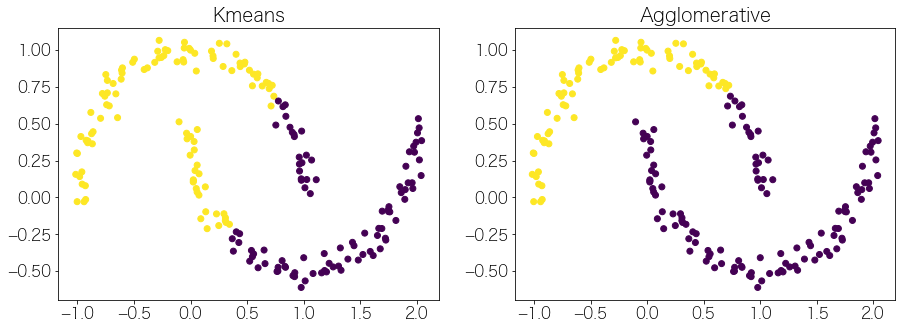

In [7]:
# hide
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
agg = AgglomerativeClustering(n_clusters=2)
agg.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(X[:,0], X[:,1], c=kmeans.labels_)
axes[0].set_title("Kmeans")
axes[1].scatter(X[:,0], X[:,1], c=agg.labels_)
axes[1].set_title("Agglomerative")
"左はKmeans、 右は凝集型クラスタリング: いずれもうまく分類できていない "

### DBSCAN
- 密度に基づくノイズあり空間クラスタリング
- 密度の高い領域がクラスタを構成していて、クラスタ間には密度が低い領域が存在するという過程
- 密度の高いコアサンプルを探し、近傍点を加える形でクラスタを作っていく
- どのクラスタにも属さないノイズ点が存在しうる
- パラメータの調整が必要
    - min_samples コアサンプルとなるために必要な近傍点数
    - eps 近傍を決める距離


'DBSCANによる分類'

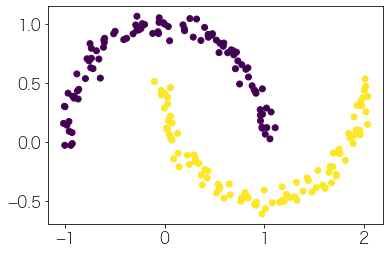

In [11]:
dbscan = DBSCAN(min_samples=5, eps=0.2)
dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
"DBSCANによる分類"